# Конспект по нейронным сетям

<a id='contents'></a>
Содержание:

- <a href='#base'>Базовые понятия</a>
- <a href='#frameworks'>Фреймворки</a> 
- <a href='#linear'>Линейная модель</a>
- <a href='#perceptron'>Перцептрон. Однослойный, многослойный (история)</a>
- <a href='#activation'>Функции активации</a>
- <a href='#initialisation'>Инициализация весов</a>
- <a href='#gradients'>Градиентный спуск</a>
- <a href='#loss'>Функционал ошибки и его виды</a>
- <a href='#metrics'>Метрики качества</a>
- <a href='#norm'>Нормализация</a>
- <a href='#dropout'>Дропаут</a>
- <a href='#smoothing'>Label smoothing</a>
- <a href='#transfer'>Transfer Learning</a>
- <a href='#fc'>Полносвязная сеть</a>
- <a href='#conv'>CNN, сверточный слой</a>. <a href='#conv_offtop'>Игрища с картинками</a>
- <a href='#cnnarch'>Архитектуры CNN</a>
- <a href='#imgseg'>Сегментация изображений</a>
- <a href='#word2vec'>word2vec</a>

**Нейронная сеть** &ndash; это граф вычислений (DAG, Directed Acyclic Graph) 

То есть, по сути, мы просто собираем кучу функций в один связный направленный граф, по которому машина потом считает. 

*Императивный подход* vs *символьный подход*:

- в императивном подходе сразу считаем все
- в символьном подходе сперва задаем граф вычислений, а потом считаем

Выгода заранее заданного графа вычислений: некоторые вещи (градиенты) не приходится считать по мильену раз. 

<a id='base'></a>
***

#### Базовые понятия

Граф вычислений &ndash; структура, по которой будет вычисляться сеть

Нейрон &ndash; линейная функция, получающая данные на вход, преобразующая их ($w \cdot x + b$) и возвращающая результат

Функция активации &ndash; (нелинейная) функция, которая преобразует выходящий из нейрона сигнал

Веса сети &ndash; или *параметры*: те самые $w_i$, все, что должно изменяться в процессе обучения с помощью градиентного спуска

Слой &ndash; набор нейронов, которые все получают одни инпуты и выдают какие-то аутпуты через функцию активации

forward (прямой проход) &ndash; пробрасывание каких-то данных на вход через весь граф вычислений

backprop(agation), бэкпроп &ndash; вычисление градиентов для обновления весов сети

Функционал ошибки (loss) &ndash; разница между предсказанным и истинным ответом, может быть выражена разными функциями (для разных задач)

Метрика &ndash; способ оценки качества работы НС, может совпадать по формуле с лоссом, но не обязано

Градиентный спуск &ndash; метод поиска минимума функции потерь (loss)

Инференс (inference) &ndash; применение обученной модели

<a href='#contents'>К содержанию</a>

<a id='frameworks'></a>
***

#### Фреймворки:

- Tensorflow + Keras: [тетрадка по керасу](kerasman.ipynb)
- PyTorch: [тетрадка по торчу](torchman.ipynb), а также [тетрадка по ignite](igniteman.ipynb) &ndash; библиотеке над торчом; [тетрадка по лайтнингу](lightningman.ipynb) &ndash; другая обертка над торчом
- AllenNLP

[Статья на хабре про разницу между ними и про торч](https://habr.com/ru/post/334380/)

*Фиксированные модули*. Такой подход можно сравнить с конструктором Lego: пользователь комбинирует заранее определённые блоки в граф вычислений и запускает его. Прямой и обратный проходы уже зашиты в каждом таком блоке. Определение новых блоков гораздо сложнее использования готовых и требует совершенно иных знаний и умений. Расширяемость близка к нулю, однако если ваши идеи полностью реализуются в таком фреймворке, скорость разработки максимальна. Со скоростью работы, благодаря высокой оптимизированности заранее написанного кода, также не возникает проблем. Типичные представители: Caffe, Caffe2, CNTK, Kaldi, DL4J, Keras (как интерфейс).

*Статический граф вычислений*. Эти фреймворки уже можно сравнить с полимерной глиной: на этапе описания возможно создать граф вычислений произвольного размера и сложности, однако после запекания (компиляции) он станет твёрдым и монолитным. Доступными останутся всего два действия: запустить граф в прямом или обратном направлениях. Все такие фреймворки используют декларативный стиль программирования и напоминают функциональный язык или математическую нотацию. С одной стороны, этот подход комбинирует гибкость на этапе разработки и скорость в момент исполнения. С другой стороны, как и в функциональных языках, отладка становится настоящей головной болью, а модели, выходящие за рамки парадигмы, требуют либо титанических усилий, либо здоровенных костылей для реализации. Представители: Theano, TensorFlow, MXNet.

*Динамический граф вычислений*. Представьте теперь, что вы можете перестраивать статический граф перед каждым его запуском. Примерно это и происходит в данном классе фреймворков. Только графа как отдельной сущности здесь нет. Он, как и в императивных языках программирования, слишком сложен для явного построения и существует лишь в в момент исполнения. Точнее сказать, граф строится динамически каждый раз при прямом проходе для того, чтобы затем иметь возможность сделать проход обратный. Подобный подход даёт максимальную гибкость и расширяемость, позволяет использовать в вычислениях все возможности используемого языка программирования и не ограничивает пользователя вообще ничем. К этому классу фреймворков как раз и относятся Torch и PyTorch.

**Декларативный фреймворк с торчом в бэкенде:**

[Ludwig](https://nuancesprog.ru/p/16027/)

<a href='#contents'>К содержанию</a>

<a id='linear'></a>
***

#### Немного повторения про машинное обучение и в частности про линейные модели

**Линейная модель** &ndash; мы пытаемся построить линейную зависимость между признаками и *целевой переменной* (*ground truth*, $\hat{y}$) вида $w \cdot x + b = y$ путем настраивания *весов* $w_1, w_2, ..., w_n$ и *свободного коэффициента*, он же смещение, он же bias $w_0$. Как настроить веса? У нас есть некоторый *функционал ошибки*, н-р, $MSE = \frac{1}{n}\sum\limits_{i=1}^{n}(Y_i - \hat{Y_i})^2$, то есть, некая разница между предсказанным y и истинным y. Мы должны эту разницу минимизировать. Это уравнение может решаться в матричном виде как $w = (X^T \cdot X)^{-1} \cdot X^T \cdot y$ &ndash; это *аналитическое решение*. Его недостатки: 1) вычислительно дорого 2) имеет решение не для всякого функционала ошибки.

Обычно задачу минимизации функционала ошибки решают с помощью *градиентного спуска*. Это *аппроксимация* (поэтому иногда про НС говорят, что это аппроксиматоры), то есть, мы не хотим точно найти ответ на наше уравнение, а только приблизительно. Идея градиентного спуска в том, что касательная к функции в точке $x$ указывает направление ее возрастания (вектор градиента), а антиградиент (т.е. градиент с минусом) &ndash; убывания. Мы находим частные производные по всем весам, которые хотим обновить, и вычитаем их из первоначальных весов. 

**Причем тут нейронки?**

А притом, что НС &ndash; это по существу много скомпонованных линейных моделей. 

<a href='#contents'>К содержанию</a>

<a id='perceptron'></a>
***

#### Перцептроны. Немного истории

Перцептрон предложил Ф. Розенблатт в 1957 году в одноименной книге. Схема перцептрона выглядит примерно так:

<img src='img/1.PNG' width='400'>

Перцептрон получает несколько сигналов, домножает их на веса, складывает со смещениями и потом складывает то, что получилось; если получившаяся сумма больше какого-то порога, сигнал проходит, если нет &ndash; то нет. Соответственно, функция активации перцептрона переводит аутпут в бинарное (-1;1). Это может быть функция шага, знака или сигмоида. 

<img src='img/2.PNG' width='400'>

[Алгоритм обучения перцептрона](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975) был не такой, как сегодня в нейронках:

<img src='https://miro.medium.com/max/1032/1*PbJBdf-WxR0Dd0xHvEoh4A.png' width='400'>
     


Вот перцептрон с сигмоидой и градиентным спуском &ndash; это уже близко к реальности. Но в 1969 году Марвин Минский с соавтором доказал, что такой одинокий перцептрон не справляется с нелинейными данными. Ну то есть, перцептрон &ndash; это все равно линейная модель, которая не умеет ничего, кроме рисования полосочек. Но что, если взять несколько полосочек и совместить их? 

Окей, если мы возьмем два нейрона (без активации) и тупо их соединим, или хоть два миллиона, на самом деле это все равно будет линейная модель, потому что можно уравнения преобразовать, раскрыть там скобочки и все равно получить условное $k \cdot x + b$. Но если между ними добавятся нелинейные функции активации, то уже схлопнуть все в линейную модель не получится. 

Соответственно, многослойный перцептрон (Multilayer Perceptron, MLP) &ndash; самый простой вариант полноценной нейронной сетки, который состоит из нескольких слоев, сообщающихся друг с другом. Эти слои:

- входной слой (input layer), тот, который получает данные на вход;
- скрытые слои (hidden layers), все, что между входом и выходом;
- выходной слой (output layer), выдает результат. 

<a href='#contents'>К содержанию</a>

<a id='activation'></a>
***

## Функции активации

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

def funcplot(func, name):
    x = np.linspace(-5, 5, 50)
    z = func
    fig, ax = plt.subplots()
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_ylim([-1, 1])
    plt.xlabel('x')
    plt.ylabel(name)
    ax.plot(x, z, '-c')

    plt.show()

Итак, на выходах каждого слоя НС обязательно должна быть функция активации. Она должна быть нелинейная (чтобы сеть могла работать с нелинейными данными) и желательно дифференцируемая: потому что когда мы делаем бэкпроп, мы считаем производные и для функции активации тоже. 

[Полный список на вики](https://en.wikipedia.org/wiki/Activation_function)

Классическая функция активации &ndash; сигмоида: $\sigma(x) = \frac{1}{1 + e^{-x}}$

График сигмоиды, как известно:

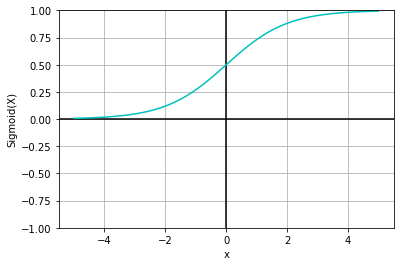

In [11]:
funcplot(1/(1 + np.exp(-x)), 'Sigmoid(X)')

Хорошая нелинейная функция, ее основной недостаток &ndash; на больших по модулю значениях, типа (-)100, ее касательная будет практически лежать, а значит, градиент будет очень маленьким числом. Этот артефакт называется *затухание градиентов* и для больших архитектур делает сигмоиду непригодной (может наступить *паралич сети*).

Соответственно, недостатки сигмоиды:
 
- <font color='red'>Затухание градиента</font>
- <font color='red'>Не центрирована относительно нуля</font>
- <font color='red'>Вычислять градиент дорого</font>

Другой вариант активации &ndash; тангенс tanh:

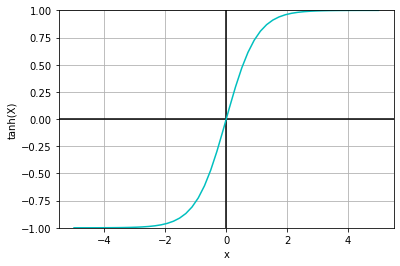

In [12]:
funcplot((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)), 'tanh(X)')

- <font color='green'>Центрирован относительно нуля</font>
- <font color='red'>Все еще похож на сигмоиду</font>
- <font color='red'>Все равно будет затухать градиент, даже еще сильнее</font>

Куда лучше ReLU (Rectified linear unit (ReLU), который выглядит следующим образом:

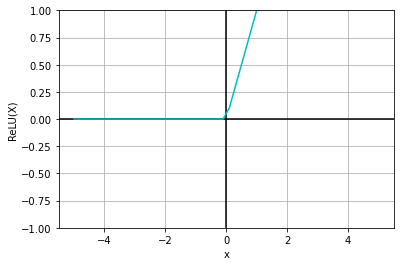

In [13]:
funcplot(np.maximum(x, 0), 'ReLU(X)')

- <font color='green'>Быстро вычисляется</font>
- <font color='green'>Градиент не затухает</font>
- <font color='green'>Сходимость сеток ускоряется</font>
- <font color='red'>Сетка может умереть, если активация занулится на всех нейронах</font>
- <font color='red'>Не центрирован относительно нуля</font>
- <font color='red'>Если $w_0$ инициализировано большим отрицательным числом, нейрон сразу умирает ⇒ надо аккуратно инициализировать веса</font>

Leaky ReLU:

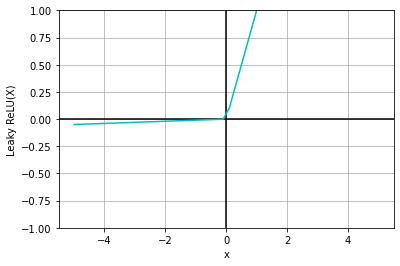

In [14]:
a = 0.01
funcplot(np.maximum(a * x, x), 'Leaky ReLU(X)')

- <font color='green'>Как ReLU, но не умирает, всё ещё легко считается</font>
- <font color='green'>Производная может быть любого знака</font>
- Важно, чтобы 𝑎 ≠ 1, иначе линейность

**Как выбирать функцию активации?**

- Обычно начинают с *ReLU*, если сетка умирает, берут *LeakyReLU*
- *ReLU* &ndash; стандартный выбор для свёрточных сетей
- В рекуррентных сетках чаще всего предпочитается *tanh*
- На самом деле это не очень важно, нужно держать в голове свойства функций, о которых выше шла речь, и понимать, что от перебора функций обычно выигрыш в качестве довольно низкий
- Но есть и исключения ...

[Статья с обзором на архиве](https://arxiv.org/pdf/1804.02763.pdf)

<a href='#contents'>К содержанию</a>

<a id='initialisation'></a>
***

## Инициализация весов

[Статья про нее](https://wandb.ai/sauravmaheshkar/initialization/reports/A-Gentle-Introduction-To-Weight-Initialization-for-Neural-Networks--Vmlldzo2ODExMTg)

От инициализации весов иногда многое зависит (см. выше, нейронка может с места в карьер сдохнуть). Обычно стремятся уменьшить симметрию и инициализируют рандомными числами из какого-нибудь распределения (нормальное, равномерное). 

Наши признаки 𝑋 пришли к нам из какого-то распределения. Выход слоя 𝑓(𝑋𝑊) будет принадлежать другому распределению. Если инициализировать веса неправильно, дисперсия распределения может от слоя к слою затухать (сигнал будет теряться) либо наоборот, возрастать (сигнал будет рассеиваться). Эмпирически было выяснено, что это может портить сходимость для глубоких сеток. Хочется контролировать дисперсию.

**Симметричный случай**

В симметричном случае распределение может быть таким:

![Distribution](img/6.PNG)

(как это читать: диаграммы показывают распределение выходов слоя слева направо, т.е. левые диаграммы после первого слоя, правые &ndash; с конца). 

Выход нейрона перед активацией такой:

$h_i = w_0 + \sum\limits_{i=1}^{n_{in}}w_i \cdot x_i$

Дисперсия $h_i$ выражается через дисперсии $x$ и $w$, не зависит от константы $w_0$. Как ее вывести:

$h = x \cdot w$ (векторное представление)

$Var(h) = E(h - E(h)^2) = E((x \cdot w - E(x \cdot w)^2)$ (по определению)

$E(x_ \cdot w) = E(x) \cdot E(w)$

Подставим

$Var(h) = E(x^2 \cdot w^2 - 2 \cdot x \cdot w \cdot E(x) \cdot E(w) + E(x)^2 \cdot E(w)^2)$

$Var(h) = E(x^2) \cdot E(w^2) - 2 \cdot E(x)^2 \cdot E(w)^2 + E(x)^2 + E(w)^2$

С другой стороны, по определению, любая дисперсия любой величины у:

$Var(y) = E(y^2) - E(y)^2$ ⇒ $E(y^2) = Var(y) + E(y)^2$

Подставляем

$Var(h) = (Var(x) + E(x)^2) \cdot (Var(w) + E(w)^2) - E(x)^2 \cdot E(w)^2$

Раскроем скобки

$Var(h) = Var(x) \cdot Var(w) + Var(x) \cdot E(w)^2 + E(x)^2) \cdot Var(w) + \color{red}{E(x)^2 \cdot E(w)^2 - E(x)^2 \cdot E(w)^2}$

Выделенная красным часть самоуничтожится, и получится (если уже не в векторном представлении):

$Var(h_i) = Var(\sum\limits_{i=1}^{n_{in}}w_i \cdot x_i) = \sum\limits_{i=1}^{n_{in}}Var(w_i \cdot x_i) = \sum\limits_{i=1}^{n_{in}}[E(x_i)]^2 \cdot Var(w_i) + [E(w_i)]^2 \cdot Var(x_i) + Var(x_i) \cdot Var(w_i)$

Если функция активации предыдущего слоя симметричная, тогда матожидание икса = 0 ($E(x_i) = 0$). Будем инициализировать веса с нулевым средним, тогда и $E(w_i) = 0$.

$Var(h_i) = Var(\sum\limits_{i=1}^{n_{in}}w_i \cdot x_i) = \sum\limits_{i=1}^{n_{in}}Var(w_i \cdot x_i) = \sum\limits_{i=1}^{n_{in}}[E(x_i)]^2 \cdot Var(w_i) + [E(w_i)]^2 \cdot Var(x_i) + Var(x_i) \cdot Var(w_i) = \sum\limits_{i=1}^{n_{in}} Var(x_i) \cdot Var(w_i) = Var(x_i) \cdot [n_{in} \cdot Var(w_i)]$

$ [n_{in} \cdot Var(w_i)] = 1 $ &ndash; нужно, чтобы так было, чтобы дисперсия выхода была примерно равна дисперсии входа

Тогда, например, если мы берем первоначальные веса из распределения вида $U\left[ -\frac{\sqrt{3}}{\sqrt{n_{in}}}; \frac{\sqrt{3}}{\sqrt{n_{in}}} \right]$, то дисперсия будет равна $Var(w_i) = \frac{1}{12} \left( -\frac{\sqrt{3}}{\sqrt{n_{in}}} + \frac{\sqrt{3}}{\sqrt{n_{in}}} \right)^2 = \frac{1}{n_{in}} = 1$.

При этом при forward pass на вход идет $n_{in}$ наблюдений, а на backward &ndash; $n_{out}$ градиентов ⇒ канал с дисперсией может быть непостоянным, если число весов от слоя к слою сильно колеблется. Для неодинаковых размеров слоёв невозможно удволетворить обоим условиям, поэтому обычно усредняют: $U\left[ -\frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}; \frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}} \right]$. Такая инициализация называется <font color='green'>инициализация Ксавье Глоро</font>. [Статья Глоро тут](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).

**Несимметричный случай**

Для несимметричного случая распределение может выглядеть так:

<img src='img/7.PNG' width='600'>

Формула та же самая, но когда нет симметрии, можно занулить только второе слагаемое:

$Var(h_i) = Var(\sum\limits_{i=1}^{n_{in}}w_i \cdot x_i) = \sum\limits_{i=1}^{n_{in}}[E(x_i)]^2 \cdot Var(w_i) + [E(w_i)]^2 \cdot Var(x_i) + Var(x_i) \cdot Var(w_i) =  \sum\limits_{i=1}^{n_{in}}Var(w_i) \cdot E(x_i^2) = E(x_i^2) \cdot \color{green}{[n_{in} \cdot Var(w_i)]}$

Инициализация, которая подходит для несимметричного случая &ndash; <font color='green'>инициализация Хе</font>. [Статья тут](https://arxiv.org/pdf/1502.01852.pdf).

Все эти сложные математические пируэты ведут, собственно, к главному выводу:

- Для симметричных функций с нулевым средним нужно использовать инициализацию Ксавье init="glorot_uniform";
- Для ReLU и им подобным инициализацию Хe init="he_uniform" или init="he_normal".

Эти две инициализации корректируют параметры распределений в зависимости от входа и выхода слоя так, чтобы поддерживать дисперсию равной единице.

Пример кода для Keras:

In [ ]:
def get_new_model():
    acc = Accuracy()
    
    model = Sequential([
        L.Dense(5, input_dim=X_train.shape[1], kernel_initializer='he_normal', activation='relu'),
        L.Dense(5, kernel_initializer='he_normal', activation='relu'),
        L.Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
    ])

Пример кода для torch (инициализация Кайминга = инициализация Хе, чувака звали Kaiming He и он китаец, поэтому никто не понял, что из этого фамилия...):

In [ ]:
class FeedforwardNeuralNetModel_with_Kaiming(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel_with_Kaiming, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Linear weight, W,  Y = WX + B
        nn.init.kaiming_normal_(self.fc1.weight)
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out

Дефолтная инициализация для PyTorch: Linear &ndash; инициализация Кайминга Хе, CNN &ndash; инициализация ЛеКуна $N(0, \frac{1}{n_{in}})$.

Инициализация в Keras: glorot_uniform. [Документация](https://keras.io/api/layers/initializers/).

<a href='#contents'>К содержанию</a>

<a id='gradients'></a>
***

## Градиентный спуск и его виды

Как считать градиенты. 

Положим, у нас сетка состоит из двух слоев, на каждом слое один нейрон с одним весом и одним смещением, а между нейронами ReLU. То есть, так:

1). $h_1 = w_1 \cdot x + b_0$ ; 2). $ h_{r} = ReLU(h_1) $ ; 3). $ out = h_{r} \cdot w_1 + b_2 $

Как посчитать градиенты для такой сетки?

$L = (y - out)^2$ &ndash; функционал ошибки MSE

Градиент для Loss:

$ \frac{\partial L} {\partial out}  = 2 \cdot (out - y)$

Для $w_2$ и $b_2$:

$ \frac {\partial L} {\partial w_2} = \frac {\partial L} {\partial out} \cdot \frac {\partial out} {\partial w_2} = 2 \cdot (out - y) \cdot h_r^T$

$ \frac {\partial L} {\partial b_2} = \frac {\partial L} {\partial out} \cdot \frac {\partial out} {\partial b_2} = 2 \cdot (out - y) \cdot 1 $ &ndash; так как производная по $b_2$ = $ (const) + \color{red}{b_2} = 1$

Для $w_1$ и $b_1$:

$\frac {\partial L} {\partial w_1} = \frac {\partial L} {\partial out} \cdot \frac {\partial out} {\partial h_r} \cdot \frac {\partial h_r} {\partial h_1} \cdot \frac {\partial h_1} {\partial w_1} = 2 \cdot (out - y) \cdot \frac {\partial out} {\partial h_r} \cdot \frac {\partial h_r} {\partial h_1} \cdot x^T $

$\frac {\partial L} {\partial b_1} = \frac {\partial L} {\partial out} \cdot \frac {\partial out} {\partial h_r} \cdot \frac {\partial h_r} {\partial h_1} \cdot \frac {\partial h_1} {\partial b_1} = 2 \cdot (out - y) \cdot \frac {\partial out} {\partial h_r} \cdot \frac {\partial h_r} {\partial h_1} \cdot 1 $ &ndash; так как производная по $b_1$ тоже = $(const) + \color{red}{b_1} = 1$

In [15]:
import torch

batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1
dtype = torch.float
device = torch.device("cpu")

In [16]:
# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
b1 = torch.randn(1, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)
b2 = torch.randn(1, output_size, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    h_1 = x.mm(w1) + b1
    h_relu = h_1.clamp(min=0)
    out = h_relu.mm(w2) + b2

    loss = (out - y).pow(2).sum().item() #MSE

    dloss_dout = 2 * (out - y)  # первая производная по лоссу

    grad_w2 = h_relu.t().mm(dloss_dout)
    grad_b2 = dloss_dout
    grad_hrelu = dloss_dout.mm(w2.t())
    grad_hrelu[h_1 < 0] = 0
    grad_w1 = x.t().mm(grad_hrelu)
    grad_b1 = grad_hrelu
 
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1.sum()  # поскольку мы считаем по батчам, то суммируем градиент
    b2 -= learning_rate * grad_b2.sum()
    if t % 100 == 99:
        print('Loss on iteration {} = {}'.format(t, loss))

Loss on iteration 99 = 142.58541870117188
Loss on iteration 199 = 141.3625946044922
Loss on iteration 299 = 140.19131469726562
Loss on iteration 399 = 139.0638427734375
Loss on iteration 499 = 137.97433471679688


Стандартный градиентный спуск (gradient descent): $ w_i = w_{i-1} - \eta \cdot g(w_{i-1})$. Это формула для обновления веса $w_i$. $\eta$ &ndash; это шаг обучения, learning rate, обычно его выбирают довольно маленьким (типа 0.001).

- Полный градиентный спуск: считаем градиенты по всем элементам выборки
- Стохастический градиентный спуск (SGD): считаем градиенты на каждом шаге по одному элементы выборки
- Мини-батч градиентный спуск (mini-batch SGD): считаем градиенты на каждом шаге по батчу (набору элементов из выборки)

В чем разница? Есть теорема, что градиентный спуск обязательно сойдется, даже стохастический (просто это случится через миллион лет). Для классического простого случая, когда у нас функция выпуклая (не имеет локальных минимумов), быстрее и стабильнее всего сходится полный градиентный спуск. Стохастический будет сходиться медленнее (но вычислительно он гораздо легче), а по батчу &ndash; нечто среднее. 

1) <img src='img/3.PNG'> 2) <img src='img/4.PNG'> 3) <img src='img/5.PNG'>

Так будет выглядеть спуск для того самого классического случая (побаловаться можно [здесь](https://deeplearning.ai/ai-notes/optimization/)). В первом случае используем полный градиентный спуск со средней скоростью learning rate, во втором случае mini-batch SGD с большой скоростью, а в третьем &ndash; SGD с большой скоростью. 

В чем важность learning rate, а также какие проблемы могут возникнуть?

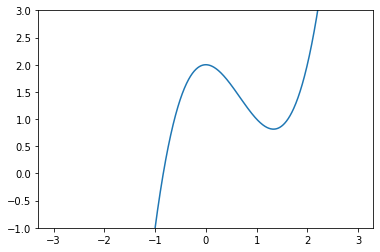

In [8]:
# Наша функция f(x)
func = lambda x: x ** 3 - 2 * x ** 2 + 2

# Производная функции f(x)
d_func = lambda x: 3 * x ** 2 - 4 * x

# Сделаем массив из 1000 элементов от -3 до 3
x = np.linspace(-3, 3, 1000)

# Определим границы по y для графика
plt.ylim([-1, 3])
plt.plot(x, func(x))
plt.show()

In [9]:
def find_minimum_first_order(
    learning_rate=0.01,
    eps=1e-4,
    max_iterations=1000,
    anneal_learning_rate=None
):
    '''Определим функцию для оптимизации, которая должна принимать на вход learning rate, максимальное количество итераций'''
    i = 0
    x_old, x_new = 0, 2
    # Будем сохранятся обновлённые значения x и y
    x_list, y_list = [x_old], [func(x_old)]
    if not anneal_learning_rate:
        anneal_learning_rate = lambda lr, step: lr
    # TODO:
    # Your code here
    # --------------
    while abs(x_new - x_old) > eps and i < max_iterations:
        # Получим learning rate для текущей итерации
        learning_rate = anneal_learning_rate(learning_rate, step=i)
        # Обновим x_old
        x_old = x_new
        # Сделаем один шаг gradient descent
        x_new = x_old - learning_rate * d_func(x_old)
        # Добавим новые значения для визуализации сходимости
        x_list.append(x_new)
        y_list.append(func(x_new))
        i += 1
    # --------------
    print("Найденный локальный минимум:", x_new)
    print("Количество шагов:", len(x_list))
    # Визуализируем сходимость
    plt.figure(figsize=[6, 4])
    plt.ylim([-3, 8])
    plt.scatter(x_list, y_list, c="r", edgecolors='k')
    plt.plot(x_list, y_list, c="r")
    plt.plot(x, func(x), c="b")
    plt.title("Descent trajectory")
    plt.show()

Найденный локальный минимум: 1.3577577123861129
Количество шагов: 729


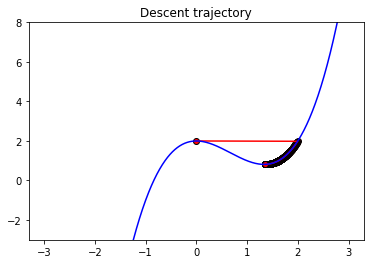

In [10]:
find_minimum_first_order(0.001)

Найденный локальный минимум: 1.3356881625009205
Количество шагов: 129


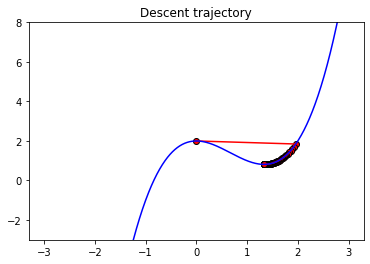

In [11]:
find_minimum_first_order(0.01)

Найденный локальный минимум: 1.3333495713163788
Количество шагов: 8


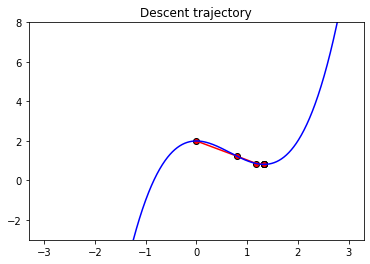

In [12]:
find_minimum_first_order(0.3)

Хотя большой learning rate опасен возможностью overflow (улетим в бесконечность), у него есть ряд преимуществ. Чем больше темп обучения, тем большие расстояния мы преодолеваем за один шаг и тем выше вероятность быстрее найти хорошее пространство локальных минимумов.

Хорошая стратегия — начинать с достаточно большого шага (чтобы хорошо попутешествовать по функции), а потом постепенно его уменьшать, чтобы стабилизировать процесс обучения в каком-то локальном минимуме.

Найденный локальный минимум: 1.294744839667743
Количество шагов: 7


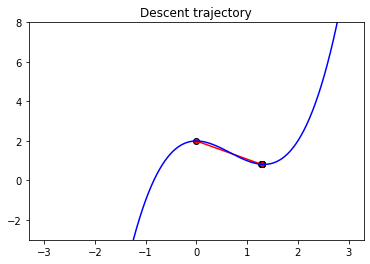

In [13]:
find_minimum_first_order(0.6, anneal_learning_rate=lambda lr, step: 0.3 * lr)

Также в торче есть готовый инструмент scheduler, который позволяет изменять шаг градиента автоматически. Имплементация такова:

In [ ]:
from torch.optim.lr_scheduler import StepLR

INIT_LR = 0.1

optimizer = optim.Adam(model.parameters(), lr=INIT_LR, betas=(0.9, 0.999), eps=1e-08)
scheduler = StepLR(optimizer, step_size=2, gamma=0.01)  # step_size - как часто шагаем, gamma - на сколько

#(в функции обучения на каждой эпохе)
if scheduler is not None:  # это если в функцию передать параметр scheduler=None
            # Decay Learning Rate
            scheduler.step()

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR

# инициализируем SGD optimizer
adam = optim.Adam(model6.parameters(), lr=INIT_LR, betas=(0.9, 0.999), eps=1e-08)

# инициализируем 
scheduler = MultiStepLR(adam, milestones=[30,80], gamma=0.1)

Описания ниже сперты у Кантонистовой

### SGD
SGD - этот же самый gradient descent, что мы рассматривали ранее, вот только подсчёт градиентов производится не по всему множеству данных, а по отдельно взятому сэмплу. Очевидно, такая оптимизация будет очень шумной, что усложнит обучение модели. Поэтому обычно используют MiniBatch-SGD, где вместо одного сэмпла мы берём $k$ семплов. У такого подхода есть несколько плюсов:

* ниже variance в сравнении с обычным SGD, что приводит к более стабильному процессу оптимизации
* хорошо работает с DL библиотеками, так как теперь мы работаем с матрицами

$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
w &=& w - \eta \times g
\end{eqnarray}
$$

### SGD with Momentum

<img src="img/Momentum.png" width="600">

Попытаемся добавить SGD эффект инерции. Теперь, вместо того чтобы двигаться строго в направлении градиента в каждой точке, мы стараемся продолжить движение в том же направлении, в котором двигались ранее. То есть у нашей точки, которая спускается по многомерной поверхности, появляется импульс (momentum), который контролируется при помощи параметра $\alpha$. Он определяет какую часть прошлого градиента мы хотим использовать на текущем шаге.
$$
\begin{eqnarray}
g_{t} &=& \alpha g_{t-1} + \eta \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
w &=& w - \eta \times g
\end{eqnarray}
$$

### Nesterov

<img src='img/nesterov.PNG' width='500'>

Можно момент добавлять по-другому: 

$$
\begin{eqnarray}
\begin{cases}
m_{i + 1} &=& \beta m_i - \gamma \Delta f(w_i + \beta m_i) \\
w_{i + 1} &=& w_i + m_{i + 1}
\end{cases}
\end{eqnarray}
$$

## Адаптивные варианты градиентного спуска
Во всех предыдущих алгоритмах у нас был фиксированный learning rate. Начиная с Adagrad у нас будут идти алгоритмы, которые подстраивают learning rate в зависимости от обучения. Они называются адаптивными вариантами градиентного спуска.

Адаптивные варианты градиентного спуска подстраивает темп обучения таким образом, чтобы делать большие или маленькие обновления отдельных параметров. Например, может так сложиться, что некоторые веса близки к своим локальным минимумам, тогда по этим координатам нужно двигаться медленнее, а другие веса ещё только в середине, значит их можно менять гораздо быстрее. Подобные методы часты приводят к более обоснованной модели и сходятся гораздо быстрее.

### Adagrad
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
s &=& s + diag(gg^{T}) \\
w &=& w - \frac{\eta}{\sqrt{s+eps}} \odot g
\end{eqnarray}
$$
Теперь нам не нужно сильно волноваться о правильном подборе $\eta$, так как $s$ контролирует скорость обучения для каждого параметра.

### RMSprop
У Adagrad есть сильный минус. $s$ - всегда положительна и постоянно растёт во время обучения, что приводит к ситуации, когда у нас learning rate становится слишком маленький, и мы перестаём учиться. RMSprop исправляет эту проблему при помощи экспоненциального сглаживания
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
s &=& \rho s + (1 - \rho) diag(gg^{T}) \\
w &=& w - \frac{\eta}{\sqrt{s+eps}} \odot g
\end{eqnarray}
$$

### Adam
Добавим не только моменты второго порядка, но и первого при обновлении параметров
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
m &=& \beta_1 m + (1 - \beta_1) g \\
v &=& \beta_2 v + (1 - \beta_2) diag(gg^{T}) \\
\hat{m} &=& \frac{m}{1 - \beta_1^{t}} \\
\hat{v} &=& \frac{v}{1 - \beta_2^{t}} \\
w &=& w - \frac{\eta}{\sqrt{\hat{v} + \epsilon}} \odot \hat{m}
\end{eqnarray}
$$

### NAdam
Адам с добавлением Нестерова. [Соответствующая статья](https://openreview.net/forum?id=OM0jvwB8jIp57ZJjtNEZ)

### AdamW

Это Адам с затуханием весов (weight decay). Подробнее можно прочитать [тут](https://towardsdatascience.com/why-adamw-matters-736223f31b5d).

В чем разница между обычным Adam(..., weight_decay=0.01) и AdamW? 

Авторы [этой статьи](https://arxiv.org/pdf/1711.05101.pdf) показали, что обычный weight_decay во всех библиотеках реализован неправильно, и предложили свой способ это исправить. 

In Adam

weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

In AdamW

weight_decay (float, optional) – weight decay coefficient (default: 1e-2)

[Еще объяснения в блоге тут](https://www.fast.ai/2018/07/02/adam-weight-decay/)

### Схема
<div>
<img src="img/Modifications.png" width="300"/>
</div>

#### Размер батча

Yann LeCun утверждает, что чем больше батч, тем лучше, но экспериментально доказано, что совсем большие батчи могут ухудшить ситуацию. С чем это связано? Если поверхность функции потерь очень сложная с кучей локальных минимумов, на большом батче мы можем угодить в локальный минимум и не выскочим из него (типа, собрали все точки с окрестностей и они все указывают в него). Поэтому батч лучше брать побольше, но если что, можно пробовать и уменьшать. 

[Некоторая статеечка](https://arxiv.org/pdf/1711.00489.pdf)

Изменение размера батча vs learning rate

<a href='#contents'>К содержанию</a>

<a id='loss'></a>
***

### Функционал ошибки и его виды

(Иначе называют функция потерь, loss)

**Регрессия**

MSE: $\frac{1}{N}\sum\limits_{i=1}^{N}(y_i - f(x_i))^2$

MAE: $\frac{1}{N}\sum\limits_{i=1}^{N}|y_i - f(x_i)|$

MAPE: $\frac{1}{N}\sum\limits_{i=1}^{N}\frac{|y_i - f(x_i)|}{y_i}$

SMAPE: $\frac{1}{N}\sum\limits_{i=1}^{N}\frac{2|y_i - f(x_i)|}{y_i + f(x_i)}$

maxerr = max(y_i - f(x_i))

**Классификация**

Некоторые виды лоссов уже внутри себя считают софтмакс, это с точки зрения оптимизации выгоднее. 

|Считает софтмакс/сигмоиду | Не считает |
| --- | --- |
|BCELosswithlogits | BCELoss |
| Crossentropy | NNLLoss |
| | KLDivLoss |



**Бинарная классификация**

Accuracy: $\frac{1}{N}\sum\limits_{i=1}^{N}[y_i = f(x_i)]$

Precision: $\frac{TP}{TP + FP}$

Recall: $\frac{TP}{TP + FN}$

F1: $\frac{2P \cdot R}{R + P}$

[ROC-AUC](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)

**Мультиклассовая классификация**

Cross-entropy: $H(p,q) = -\sum\limits_{i = 1}^{N}\sum\limits_{j = 1}^{C}y_{ij}\log \frac{e^{<w_j, x_i>}}{\sum\limits_{k = 1}^{K}e^{<w_k, x_i>}}$

NNLLoss: $-\log y$

[Log-loss](https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a): $L = -\frac{1}{N}\sum\limits_{i=1}^{N}[y_i\ln p_i + (1 - y_i) \ln (1 - p_i)]$

[Дивергенция Кульбака-Лейблера](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-understanding-kl-divergence-2b382ca2b2a8): $y_n \cdot ( \log y_n - x_n)$ (для одного наблюдения) &ndash; используется при label smoothing, в торче называется KLDivLoss

**Сегментация изображений**

Для одного изображения: $L(y, a) = -\sum\limits_{i=1}^{n}\sum\limits_{k=1}^{K}[y_i = k]\log a_{ik}$ (по сути это кросс-энтропия. $a_{ik}$ &ndash; пиксель, ответ для которого тоже софтмаксим)

Google совсем недавно выпустил интересную статью про [Local Loss Optimization](https://ai.googleblog.com/2022/07/enhancing-backpropagation-via-local.html?m=1). Вкратце суть: лоссы на каждом слое разные, "LocoProp applies pre-defined local loss functions specific to each layer".

<a href='#contents'>К содержанию</a>

<a id='metrics'></a>
***

### Метрики качества для разных задач

**Регрессия**

Примерно те же, что и для лосса

**Классификация**

Примерно те же, что и для лосса

**Сегментация изображений**

Попиксельная доля верных ответов: $L(y, a) = \frac{1}{n}\sum\limits_{i-1}^{n}[y_i = a_i]$

Мера Жаккара (IoU, Intersection over Union): $J_k(y, a) = \frac{\sum\limits_{i-1}^{n}[y_i = k][a_i = k]}{\sum\limits_{i-1}^{n}max([y_i = k][a_i = k])}$, a &ndash; ответ модели, y &ndash; истинный ответ, k &ndash; класс. То есть, пересечение ответов делим на объединение

<a href='#contents'>К содержанию</a>

<a id='norm'></a>
***

### Нормализация

Первоначальная проблема, с которой пытались бороться &ndash; Covariate Shift (изменение распределения данных). Объекты могут быть по-разному распределены на обучении и на тестировании, распределение может изменяться после прохождения очередного слоя (internal covariate shift). 

Придумали для этого делать Batch Normalisation:

- Реализуется как отдельный слой
- Вычисляется для текущего батча
- Оценим среднее и дисперсию каждой компоненты входного вектора: 

$$\mu_B = \frac{1}{n} \sum\limits_{j=1}^{n}x_{B,j}$$

$$\sigma_B^2 = \frac{1}{n} \sum\limits_{j=1}^{n}(x_{B,j} - \mu_B)^2 : покоординатно$$ 

($x_{B,j}$ &ndash; j-й объект в батче

Отмасштабируем все выходы:

$$\tilde{x}_{B,j} = \frac{x_{B,j} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$

Зададим нужные нам среднее и дисперсию:

$$z_{B,j} = \gamma \cdot \tilde{x}_{B,j} + \beta $$

Здесь $\gamma$ и $\beta$ &ndash; обучаемые параметры сети. 

Итого: 

- Позволяет увеличить длину шага в градиентном спуске
- *Не факт, что действительно устраняет covariance shift*

[Статья о нормализации](https://arxiv.org/pdf/1805.11604.pdf)

**Вопрос**: куда лучше помещать батчнорм?

Однозначного ответа на этот вопрос нет. Кто-то считает, что нужно помещать между слоем и активацией, кто-то говорит, что после активации. В последнее время, судя по всему, преобладает последнее мнение (но Женя Соколов считает, что до активации, а Дима Андросов и Влад Соловей считают, что после). Скорее всего, лучше проверять на практике, как будет работать. 

<a href='#contents'>К содержанию</a>

<a id='dropout'></a>
***

### Дропаут

Когда у нас мало данных и полносвязные слои, получается, что в сетке слишком много параметров и она сильно переобучается. Чтобы уменьшить переобучение в таком случае, можно сетке <s>дать молотком по башке</s> принудительно отключить часть нейронов, занулив их выходы. Это и называется dropout. Как это работает?

- Можно определить как слой $d(x)$
- Параметров нет, единственный гиперпараметр &ndash; $p$ (вероятность удаления нейрона)
- На этапе обучения: $d(x) = \frac{1}{p}m \cdot x$ (m &ndash; вектор того же размера, что и х, элементы берутся из распределения Бернулли)
- Деление на p нужно для сохранения суммарного масштаба выходов

[Статья про дропаут](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Интерпретация: мы обучаем все возможные архитектуры нейросетей, которые получаются из исходной выбрасыванием отдельных нейронов. У всех этих архитектур общие веса. На этапе применения (почти) усредняем прогнозы всех этих архитектур.

Дропаут + нормализация: нормальная практика делать батчнорм, потом слой, потом дропаут без батчнорма

<a href='#contents'>К содержанию</a>

<a id='smoothing'></a>
***

#### Label Smoothing

Способность к обобщению и скорость обучения мультиклассовой НН часто может быть значительно улучшена с использованием "мягких" целей, которые представляют собой взвешенное среднее "жестких" целей и равномерное распределение по ярлыкам классов. Сглаживание ярлыков таким образом мешает НН стать слишком уверенной и поэтому используется во многих SOTA-моделях, включая классификацию картинок, МП и ASR.

LS имплементировано в tf на уровне параметра функционала ошибки, н-р:

    tf.keras.losses.BinaryCrossentropy(
        from_logits=False,
        label_smoothing=0.0,
        axis=-1,
        reduction=losses_utils.ReductionV2.AUTO,
        name='binary_crossentropy'
    )
    
В торче тоже есть такая имплементация:

    torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean', label_smoothing=0.0)
    
[Некоторая статья на тему](https://towardsdatascience.com/what-is-label-smoothing-108debd7ef06)

<a href='#contents'>К содержанию</a>

<a id='transfer'></a>
***

### Transfer learning (обучение с переносом знаний)

Берем сеть, обученную на *похожую* задачу, и переобучаем ее голову. 

Для не очень похожей задачи можно дообучить несколько последних слоев. 

**Finetuning**: инициализируем веса переучиваемых слоев весами с другой сети

Разница между Transfer learning & Finetuning:

- TL: реинициализация
- FT: берем готовые веса другой сети

**CNN**:

[Torchvision](https://pytorch.org/vision/stable/models.html) содержит некоторые готовые свертки, в их числе, например, ResNET.

In [ ]:
# загружаем готовую модель SqueezeNet1.1
model = torchvision.models.squeezenet1_1(
    pretrained=True,
    num_classes=1000)

In [ ]:
# можно посмотреть, какая у нее архитектура
print(model)

In [ ]:
# A mini-batch of 5 random images
sample_input = torch.randn(5, 3, 224, 224)
sample_output = model(sample_input)

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. You can use the following transform to normalize:

In [ ]:
normalize = torchvision.transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])

In [ ]:
import PIL.Image

def predict(image):
    """
    image:
        PIL.Image

    return:
        tensor, shape == (1000,)
        ImageNet class probabilities.
    """
    # Scale the image to 224x224 pixels
    print('before resize:', image.size)
    image = image.resize((224, 224))
    print('after resize:', image.size)

    # Convert `PIL.Image` to `torch.tensor` and normalize
    image = torchvision.transforms.ToTensor()(image)
    image = normalize(image)
    
    # Add singleton batch dimension with [None]
    image = image[None]
    
    # Predict class scores
    prediction = model(image)
    
    # Convert class scores to probabilities
    prediction = prediction.softmax(axis = 1)
    
    # Remove singleton batch dimension
    
    return prediction[0],prediction

**Предсказывание по реальной картинке**:

In [ ]:
import urllib

# IMAGE_URL = "http://qph.fs.quoracdn.net/main-qimg-3c711f9ad560f1703125f2839f5d8ad6"
# IMAGE_URL = "http://bestfunnies.com/wp-content/uploads/2015/05/TOP-30-Cute-Cats-Cute-Cat-2-570x428.jpg"
# IMAGE_URL = "https://i.pinimg.com/originals/23/dd/90/23dd903fc557cfbc95f0176c24829c95.jpg"
IMAGE_URL = "https://i.pinimg.com/474x/6e/d3/0c/6ed30c47246083096f0d9b79e122dace.jpg"

with urllib.request.urlopen(IMAGE_URL) as f:
    image = PIL.Image.open(f)

image

In [ ]:
image.resize((224, 224))

In [ ]:
probabilities,proba = predict(image)

top_probabilities, top_indices = torch.topk(probabilities, 10)
print("10 most probable classes are:")
for probability, class_idx in zip(top_probabilities, top_indices):
    print("%.4f: %s" % (probability, imagenet_class_names[class_idx]))

Our network is some convolutional part `model.features` followed by a classification block `model.classifier` (you learn this by reading model's `forward()` in its [source code](https://github.com/pytorch/vision/blob/master/torchvision/models/squeezenet.py)).

`model.features` outputs a stack of 512 uninterpretable feature maps, of size $20 \times 20$ in this case:

In [ ]:
sample_input = torch.randn(5, 3, 333, 333)
model.features(sample_input).shape

**Как обучить Random Forest на фичах от сетки**:

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]) 
])

train_dataset_224 = torchvision.datasets.ImageFolder('data/' + 'train', transform)
val_dataset_224   = torchvision.datasets.ImageFolder('data/'+'test'  , transform)

image, _ = train_dataset_224[66]
print(f"Datasets now return images as tensors of size {image.shape} and datatype {image.dtype}")

assert \
    torch.is_tensor(image) and \
    image.dtype == torch.float32 and \
    image.shape == (3, 224, 224)

In [ ]:
BATCH_SIZE = 2
NUM_WORKERS = 2

train_dataloader = torch.utils.data.DataLoader(
    train_dataset_224, batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS, shuffle=True, pin_memory=True)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset_224, batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS, shuffle=False, pin_memory=True)

print(f"Train/val dataloaders have {len(train_dataloader)} and {len(val_dataloader)} batches")

In [ ]:
def compute_embeddings(dataloader):
    """
    Compute latent embeddings for all images in `dataloader` using `model` CNN.
    
    dataloader:
        torch.utils.data.DataLoader
    
    return:
    X:
        tensor, shape: (len(dataloader.dataset), 512), dtype: float32, device: 'cpu'
    y:
        tensor, shape: (len(dataloader.dataset),)    , dtype: int64  , device: 'cpu'
    """
    X, y = [], []

    with torch.no_grad():
        for images, labels in tqdm(dataloader):
            y.append(labels)

            features = model.features(images.to(DEVICE)).mean([2, 3]) # (B, 512, 13, 13)
            print(features.shape)
            X.append(features.cpu())

    return torch.cat(X), torch.cat(y)

In [ ]:
images, _ = iter(train_dataloader).next()
features = model.features(images.to(DEVICE)).mean([2, 3]) # (B, 512, 13, 13)
print(features.shape)  # the shape of tensor representing 1 batch

In [ ]:
X_train, y_train = compute_embeddings(train_dataloader)
X_val  , y_val   = compute_embeddings(val_dataloader)

In [ ]:
import sklearn.ensemble
import sklearn.metrics

classifier = sklearn.ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)

train_accuracy = sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train))
val_accuracy   = sklearn.metrics.accuracy_score(y_val  , classifier.predict(X_val))

print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

**Как заменить последние слои и переобучить их**

In [ ]:
class RetrofittedCNN(torch.nn.Module):
    def __init__(self):
        super().__init__()

        pretrained_net = torchvision.models.squeezenet1_1(
            pretrained=True,
            num_classes=1000)
        self.CNN = pretrained_net.features

        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(512, 512),
            torch.nn.BatchNorm1d(512),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(512, len(class_names))
        )

    def forward(self, images):
        """
        Define the forward pass.
        """
        features = self.CNN(images).mean([2, 3])
        return self.classifier(features)

torch.manual_seed(666) # for reproducibility
model = RetrofittedCNN().to(DEVICE)
model.CNN.requires_grad_(False)

In [ ]:
trainable_parameters = model.classifier.parameters()

learning_rate = 3e-3
optimizer = torch.optim.Adam(
    trainable_parameters, lr=learning_rate, weight_decay=1e-4)

# Our loss function is negative log likelihood of the correct class
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# Please read this cell and understand what's going on!

def validate(model, dataloader):
    """Compute accuracy on the `dataloader` dataset."""
    model.eval()

    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in dataloader:
            labels = labels.to(DEVICE)
            probabilities = model(images.to(DEVICE))
            predictions = probabilities.max(1)[1]

            total += len(labels)
            correct += (predictions == labels).sum().item()
            
    return correct / total

def train(model, dataloader, criterion, optimizer):
    """Train for one epoch, return accuracy and average loss."""
    model.train()

    correct, total = 0, 0
    total_loss = 0.0

    for images, labels in tqdm(dataloader):
        probabilities = model(images.to(DEVICE))

        with torch.no_grad():
            labels = labels.to(DEVICE)
            predictions = probabilities.max(1)[1]
            
            total += len(labels)
            correct += (predictions == labels).sum().item()

        loss_value = criterion(probabilities, labels)
        total_loss += loss_value.item() * len(labels)
        
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()
    
    return correct / total, total_loss / total

In [ ]:
def set_learning_rate(optimizer, new_learning_rate):
    """Set learning rates of the optimizer to `new_learning_rate`."""
    for param_group in optimizer.param_groups:
        param_group['lr'] = new_learning_rate

In [ ]:
epochs = 0
train_accuracy, val_accuracy, train_loss = float('nan'), float('nan'), float('nan')

In [ ]:
images, labels = iter(train_dataloader).next()
probabilities = model(images.to(DEVICE))
print(probabilities.shape)
predictions = probabilities.max(1)[1]

In [ ]:
for _ in range(15):
    # Compute validation accuracy
    val_accuracy = validate(model, val_dataloader)
    print(
        f"After {epochs} epochs, training accuracy: {train_accuracy * 100:.2f}%"
        f" (loss {train_loss:.4f}), validation accuracy: {val_accuracy * 100:.2f}%")

    # Train for one epoch
    train_accuracy, train_loss = train(model, train_dataloader, criterion, optimizer)
    epochs += 1

    # Decrease learning rate sometimes
    if epochs in (8, 12, 14):
        learning_rate = learning_rate/10
        set_learning_rate(optimizer, learning_rate)
        print(f"Decreasing the learning rate to {learning_rate}")

# Compute final validation accuracy
val_accuracy = validate(model, val_dataloader)
print(
    f"After {epochs} epochs, training accuracy: {train_accuracy * 100:.2f}%"
    f" (loss {train_loss:.4f}), validation accuracy: {val_accuracy * 100:.2f}%")

**Как нафайнтьюнить всю сетку**

We have seen that `model.features` is already a good feature extractor. Still, it's not aware of our dataset.

Let's train **all** layers (including our new retrofitted classifier) to get extra accuracy. This process is called **fine-tuning**.

Because the original `model.features`' weights are valuable, fragile and co-adapted, fine-tuning requires several precautions:

* If the retrofitted classifier's weights are random, it will propagate large gradients into the pre-trained CNN. That can wreck the pre-trained weights. That's why one should either
  * train the retrofitted classifier alone for a while (**we've just done this**); or
  * assign a larger learning rate to the classifier and a smaller one to pre-trained weights (e.g. $10^{-2}$ and $10^{-4}$ with SGD); or
  * (an option for the lazy) train everything with a reduced learning rate (e.g. $10^{-3}$).
* Use a less aggressive optimizer, e.g. momentum SGD, Adam with warm-up (**we do this below**), or RAdam.
* Use a smaller learning rate than usually. **Below I used $\leq 10^{-4}$**, while on random weights I'd use something around $10^{-3}$.

In [ ]:
# Don't forget to turn gradient computing back on.
# We "froze" the CNN above. "Unfreeze" it.
model.CNN.requires_grad_(True)

Here, we set zero learning rate to warm Adam up.

Warm-up means running some iterations without any weight updates, just to let Adam accumulate gradient statistics. Otherwise, its first optimization steps will be very noisy and destructive for the pre-trained weights.

In [ ]:
# Now the parameters have to include both CNN's and classifier's weights
trainable_parameters = model.parameters()

learning_rate = 0
optimizer = torch.optim.Adam(
    trainable_parameters, lr=learning_rate, weight_decay=1e-4)

In [ ]:
train(model, train_dataloader, criterion, optimizer)

In [ ]:
learning_rate = 1e-4
set_learning_rate(optimizer, learning_rate)

In [ ]:
epochs = 0
train_accuracy, val_accuracy, train_loss = float('nan'), float('nan'), float('nan')

In [ ]:
# Your code here
# Copy the training loop from above.
# - Train for 15 epochs.
# - Drop learning rate by a factor of 10 at epochs 7 and 12.

epoch_number = 15
for _ in range(epoch_number):
    # Compute validation accuracy
    val_accuracy = validate(model, val_dataloader)
    print(
        f"After {epochs} epochs, training accuracy: {train_accuracy * 100:.2f}%"
        f" (loss {train_loss:.4f}), validation accuracy: {val_accuracy * 100:.2f}%")

    # Train for one epoch
    train_accuracy, train_loss = train(model, train_dataloader, criterion, optimizer)
    epochs += 1

    # Decrease learning rate sometimes
    if epochs in (7, 12):
        learning_rate /= 10
        set_learning_rate(optimizer, learning_rate)
        print(f"Decreasing the learning rate to {learning_rate}")

# Compute final validation accuracy
val_accuracy = validate(model, val_dataloader)
print(
    f"After {epochs} epochs, training accuracy: {train_accuracy * 100:.2f}%"
    f" (loss {train_loss:.4f}), validation accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
epoch_number = 15
torch.save(model.state_dict(), f'weights_{epoch_number}.pth')

<a href='#contents'>К содержанию</a>

<a id='fc'></a>
***

#### Полносвязная сеть. Полносвязный слой (Fully connected, FC, Linear)

Полносвязный слой &ndash; это такой слой нейронов, где выходы из *всех* нейронов (предыдущего слоя) приходят на вход ко *всем* нейронам. 

- на входе $n$ чисел, на выходе $m$ чисел. Они необязательно совпадают, может быть любое больше или меньше другого;
- $x_1, x_2, ..., x_n$ &ndash; входы;
- $z_1, z_2, ..., z_m$ &ndash; выходы;
- Каждый выход &ndash; линейная модель над входами:

$z_j = \sum\limits_{i=1}^{n}w_{ji}x_i + b_i$

Итого в полносвязном слое $m \cdot n$ параметров. Выглядит он так:

<img src='img/fc.PNG' width='300'>

**Сколько нейронов в скрытом слое?**

Существуют рекомендованные варианты возможного количества нейронов:

- Число нейронов скрытого слоя должно быть между числом входов и числом выходов;
- Число нейронов скрытого слоя должно быть 2/3 от размера входного слоя + размер выходного слоя
- Число нейронов скрытого слоя должно быть меньше 1/2 числа входов. 

Таким образом, если на входе 90 признаков, а на выходе -- 1, то можно взять 45, например. 

Вообще видов слоев очень много:

<img src='img/torchlayers.PNG' width='600'>

<a href='#contents'>К содержанию</a>

<a id='conv'></a>
***

## CNN и сверточные слои

Свертки позволяют работать в первую очередь с изображениями, но на самом деле не только с ними: еще с текстами и с временными рядами. 

Как работать с изображениями?

Импортируем все необходимое для работы

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from matplotlib import cm
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline

Откроем любую картинку

Image format: JPEG; shape: (640, 427); color scheme: RGB


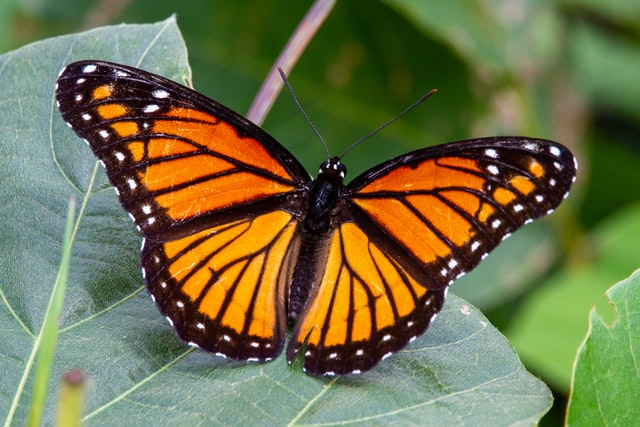

In [2]:
from PIL import Image

img = Image.open("img/butterfly.jpg")
print(f"Image format: {img.format}; shape: {img.size}; color scheme: {img.mode}")
img

Любая картинка в компе &nbash; это матрица (если картинка черно-белая, то одна, а если цветная &ndash; то матриц столько, сколько каналов, н-р, для RGB их 3)

Image matrix shape: (427, 640, 3)


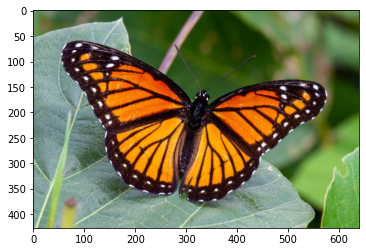

In [3]:
# получаем тензор
img_matrix = np.array(img)

# (высота, ширина, число каналов)
print(f"Image matrix shape: {img_matrix.shape}")

# нарисуем картинку матплотлибом
plt.imshow(img_matrix)
plt.show()

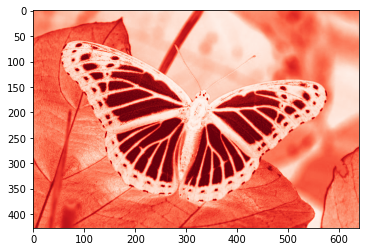

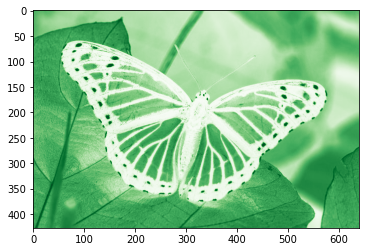

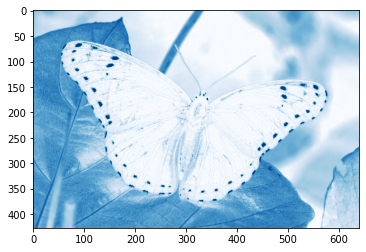

In [4]:
# посмотрим на все каналы изображения отдельно
plt.imshow(img_matrix[:, :, 0], cmap=cm.Reds)
plt.show()

plt.imshow(img_matrix[:, :, 1], cmap=cm.Greens)
plt.show()

plt.imshow(img_matrix[:, :, 2], cmap=cm.Blues)
plt.show()

Чтобы найти характеристики на картинке, используется метод свертки. Что это такое? Мы берем какой-то фильтр (матрицу маленького размера, заполненную определенными числами) и применяем его на изображение последовательно, то есть, идем этим фильтром по матрице и перемножаем ее кусочки на фильтр. Эта тема используется давно, например, в фотошопе (все ранние фильтры фш типа блюра, шарпена и проч. &ndash; это такие умножения на матрицу). В результате получаем изображение (матрицу) меньшего размера, которое как бы агрегирует в себе признаки большого. 

Для работы с изображениями есть понятие *receptive field* &ndash; это область "видимости" для одного фильтра (см. гифки ниже). 

В PyTorch свёрточный слой представлен в модуле `nn` функцией [`Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) с параметрами:
- количество входных каналов `in_channels`
- количество выходных каналов `out_channels`
- размер ядра `kernel_size`
- шаг `stride`
- паддинг `padding`
- режим паддинга `padding_mode` (`'zeros'`, `'reflect'` и др.)
- `dilation`

**Размер ядра** - `int`, если ядро квадратное, и кортеж из двух чисел, если ядро прямоугольное. Задает размер фильтра, с которым производится свертка изображения.

![no_padding_no_strides.gif](img/no_padding_no_strides.gif)

**Шаг** - задает шаг, в пикселях, на который сдвигается фильтр. `int`, если по горизонтали и вертикали сдвигается на одно и то же число. Кортеж из двух чисел, если сдвиги разные.

![no_padding_strides.gif](img/no_padding_strides.gif)

**Паддинг** - количество пикселей, которыми дополняется изображение. Аналогично шагу и размеру ядра, может быть, как `int`, так и кортежем из двух чисел.

**Half padding**

![same_padding_no_strides.gif](img/same_padding_no_strides.gif)

Применим оператор Собеля для детектирования границ на изображении. (Оператор Собеля &ndash; давно хорошо известная хрень).

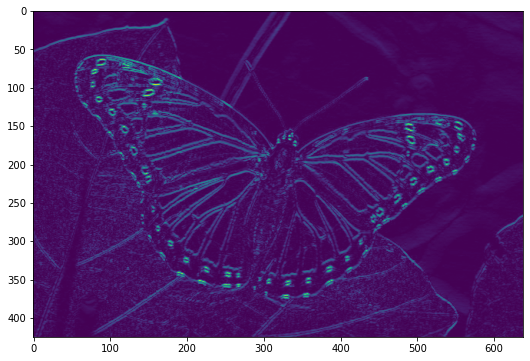

In [5]:
import torch
from torch.nn.functional import conv2d

img_tensor = torch.tensor([img_matrix], dtype=torch.float)
img_tensor.size()  # (число изображений, высота, ширина, число каналов)

img_tensor = img_tensor.permute(0, 3, 1, 2)
img_tensor.size()  # (число изображений, число каналов, высота, ширина)

#
sobel_hor = [[-1, -2, -1], 
             [ 0,  0,  0], 
             [ 1,  2,  1]]

# одна матрица на каждый канал картинки
kernel  = [[sobel_hor, sobel_hor, sobel_hor]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size() # (число выходных каналов, число входных каналов, высота, ширина)

# свернём картинку с подготовленным ядром свёртки
img_conv_hor = conv2d(img_tensor, kernel)
img_conv_hor = img_conv_hor.permute(0, 2, 3, 1)
img_conv_hor.size()  # (число изображений, высота, ширина, число каналов)

plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_hor[0, :, :, 0]))
plt.show()

Аналогичная процедура с рандомным фильтром:

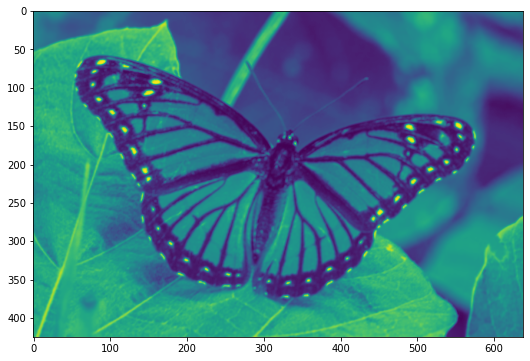

In [6]:
### solution
kernel = torch.rand((1, 3, 3, 3), dtype=torch.float)
### the end

# свертка изображения
img_conv_ver = conv2d(img_tensor, kernel)
img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)

# рисуем результат
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_ver[0, :, :, 0]))
plt.show()

Реализация сверток на торче в соответствующей [тетрадке](torchman.ipynb).

**Для чего нужен паддинг?**

Для детекции паттернов на краях. Иногда, впрочем, он детектит ложные паттерны, потому что на краях мы не знаем, что может быть. Варианты паддинга могут быть разные: можно добивать нолями, можно зеркалить, можно копировать крайние цифры. Идеальных нет. 

**Для чего нужны страйды и пулинги?**

Для снижения размерности + чтобы один пиксель на выходе "видел" как можно больше пикселей на входе. Пулинг может быть Max, а может Average. 

<img src='img/receptivefield1.PNG' width='300'> <img src='img/receptivefield2.PNG' width='300'>

**Аугментация**

Тогда и только тогда, когда датасет маленький и расширить его естественным образом нельзя, можно использовать аугментацию: видоизменять существующие картинки. Можно их поворачивать, изменять цветовую гамму, применять стандартные фотошопные фильтры. 

**NB** Сверточный слой 1х1 действует примерно как PCA: мы не меняем размер картинки, но схлопываем число каналов. 

Ядра сверток лучше делать маленькие, потому что две свертки 3х3 подряд покрывают ту же часть изображения, что и свертка 5х5, но на них уходит меньше параметров. 

Можно использовать неквадратные свертки, например, архитектура Inception V3 (2015) использует свертки 3х1 и 1х3. 

<a href='#contents'>К содержанию</a>

<a id='conv'></a>

#### Оффтоп: всякие-разные фильтры для работы с картинками

Пакет нужно установить:

    pip install opencv-python

In [7]:
import cv2 # Пакет для работы с фоточками 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_1 = cv2.add(img, 30) # осветление

# для разных каналов осветление
r, g, b = cv2.split(img)
r_shift = 10
r = cv2.add(r, r_shift)
g_shift = 50
g = cv2.add(g, g_shift)
b_shift = 10
b = cv2.add(v, b_shift)
image = cv2.merge((r, g, b))

img_2 = cv2.multiply(img, 1.3) # повышаем контраст

# распределение цветов на графике
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr,color = col)
    plt.xlim([0, 256])
plt.show()

# размытие
kernel = np.ones((30,30), np.float32) / 900  # Создали в нумпай матрицу из чисел 1/900 размера 30 на 30
dst = cv2.filter2D(img, -1, kernel)          # применили матрицу к нашей картинке 

# сглаживание
kernel = 0.1 * np.ones((3,3), np.float32)
dst = cv2.filter2D(img, -1, kernel)

# увеличение четкости
kernel = -0.1 * np.ones((3, 3), np.float32)
kernel[1,1] = 2
dst = cv2.filter2D(img, -1, kernel)

img = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2BGR) # Сделаем картинку серой

* Ядро для увеличения яркости. 

$$ \begin{pmatrix}
-0.1 & 0.2 & -0.1  \\
0.2 & 3 & 0.2 \\         
-0.1 & 0.2 & -0.1 
\end{pmatrix} $$

* Ядро для затемнения. 

$$ \begin{pmatrix}
-0.1 & 0.1 & -0.1  \\
 0.1 & 0.5 & 0.1 \\         
-0.1 & 0.1 & -0.1 
\end{pmatrix} $$

* Ядро, которое ничего не делает 

$$ \begin{pmatrix}
0 & 0 & 0  \\
0 & 1 & 0 \\         
0 & 0 & 0 
\end{pmatrix} $$

* Ядро, которое сдвигает картинку

$$ \begin{pmatrix}
1 & 0 & 100  \\
0 & 1 & 50     
\end{pmatrix} $$


* Эрозия и наращивание. Выбираем пиксель с максимальной или минимальной интенсивностью из окрестности.  Наращиваение приводит к увеличению ярких объектов, а эрозия к увеличению тёмных. Наращивание может быть использовано для увеличения бликов ярких изображений. Обычно эрозия имеет округлую форму и выглядит, например, так:

$$ \begin{pmatrix}
0 & 0 & 1 & 0 & 0  \\
0 & 1 & 1 & 1 & 0  \\         
1 & 1 & 1 & 1 & 1  \\
0 & 1 & 1 & 1 & 0  \\        
0 & 0 & 1 & 0 & 0
\end{pmatrix} $$

**Эквилизация**

Хорошая [статья](https://habr.com/ru/post/244507/) на тему

Изобразим гистограмму картинки и эмпирическую функцию распределения яркости пикселя.

Наши пиксели, на представленной ниже картинке сосредочены по своей яркости на определённом промежутке. Из-за этого мы не можем чётко выделить объекты на картинке. Если мы растянем пиксели по яркости в разные углы интервала, объекты начнут выделяться более чётко. В этом состоит смысл эквилизации. В ходе этого растягивания эмпирическая функция распределения станет прямой. 

(([], []), ([], []))

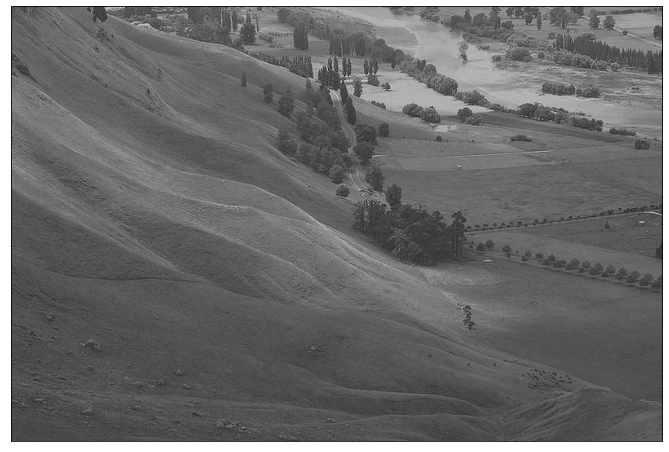

In [5]:
img = cv2.imread('img/forest.jpg', 0)

plt.figure(figsize = (12, 8))
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])

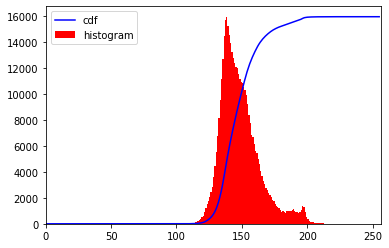

In [9]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

Код для эквилизации:

(([], []), ([], []))

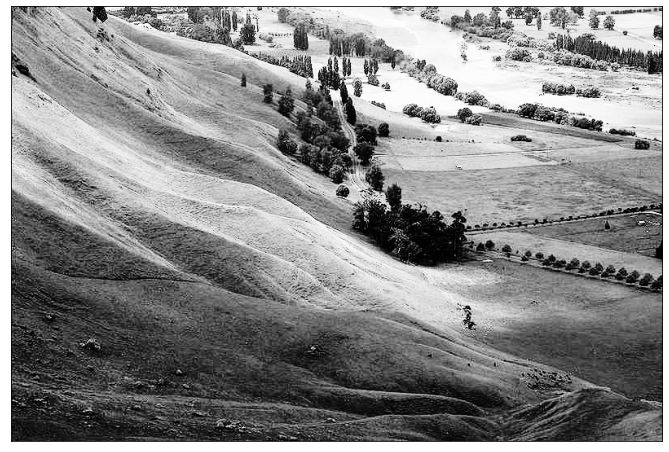

In [11]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) / (cdf_m.max() - cdf_m.min()) * 255
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img2 = cdf[img]

plt.figure(figsize = (12, 8))
plt.imshow(img2,cmap='gray')
plt.xticks([]), plt.yticks([])

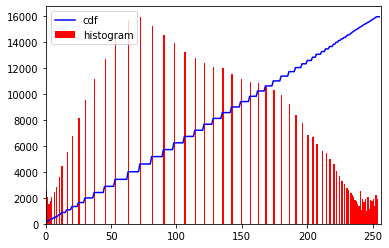

In [13]:
hist, bins = np.histogram(img2.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

Контраст на изображении стал виден более чётко. Гистограмма растянулась по яркости на весь диапозон. Внутри пакета есть более удобная для эквилизации функция.

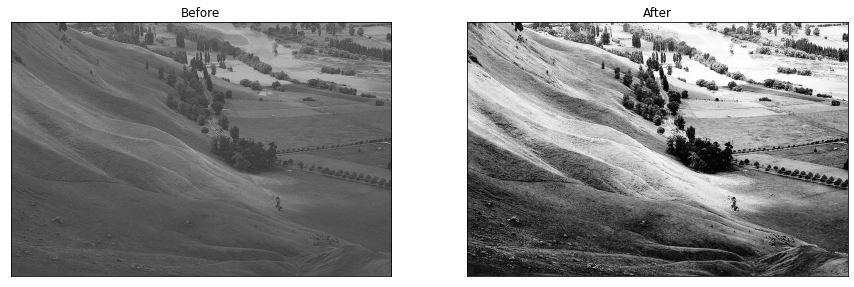

In [14]:
plt.figure(figsize = (15, 15))

img2 = cv2.equalizeHist(img) # эквилизация гистограммы

plt.subplot(121), plt.imshow(img,cmap='gray'), plt.title('Before')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2,cmap='gray'), plt.title('After')
plt.xticks([]), plt.yticks([])
plt.show()

<a href='#contents'>К содержанию</a>

<a id='cnnarch'></a>
***

### Архитектуры CNN

- [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf):
    - Для данных MNIST
    - Идея end-to-end обучения
    - Использовали аугментацию
    - Около 60.000 параметров
    - Доля ошибок на тесте 0.8%
- [ImageNet](https://image-net.org/challenges/LSVRC/)
    - ImageNet Large Scale Visual Recognition Challenge (ILSVRC)
    - Около 1.000.000 изображений
    - 1000 классов
    - Обычно качество измерялось на основе лучшей гипотезы модели (т.е. если модель среди пяти топовых вариантов класса один выдала верный, ей засчитывалось за вин)
- [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
    - Используют ReLU, аугментацию, dropout
    - Градиентный спуск с инерцией (momentum)
    - Обучение на двух GPU (5-6 суток)
    - Около 60 миллионов параметров
    - Ошибка около 17%
    - граф вычислений сети распадается на две части просто потому, что две GPU
- [VGG](https://arxiv.org/pdf/1409.1556.pdf)
    - Только маленькие свёртки
    - Градиентный спуск с инерцией
    - Dropout для двух первых полносвязных слоёв
    - Хитрая инициализация (сначала обучается вариант A со случайными начальными весами, потом им инициализируются более глубокие сети: потому что иначе просто мощностей тогда не хватало)
- [GoogLeNet (Inception)](http://arxiv.org/abs/1409.4842)
    - Снижается число каналов перед «тяжёлыми» свёртками
    - Несколько выходных слоёв для улучшения обучаемости (промежуточные выходные слои нужны для того, чтобы градиент не затухал, а то ему очень долго идти)
    - Обучается градиентным спуском с инерцией
    - Ошибка 6.67% на ImageNet
- [ResNet](https://arxiv.org/abs/1512.03385)
    - Выводы авторов: добавление слоёв в свёрточную сеть ухудшает качество даже на обучении
    - Выводы авторов: Хотя возможностей для переобучения больше, сеть почему-то не может ими воспользоваться
    - Причина: когда слоев много, градиенты на нижних слоях почти не содержат информации
    - Предложили: добавить Residual Connection (просто выход слоя суммируется с предыдущим: можно конкатенировать, а можно складывать. Через раз называется еще skip-connection)
    - Даёт низкую ошибку на обучении даже с 1000 слоёв (но там плохо на тестовой выборке)
    - Обучается градиентным спуском с инерцией со случайной инициализацией 
    - Ошибка 4.49% на ImageNet
- [Xception](https://arxiv.org/abs/1610.02357)
    - Разделяется роль свёрток: либо по каналам, либо по пространству
    - Более эффективное использование параметров

Другие:
- Highway networks
- Inception-ResNet
- Squeeze and Excitation Network
- MobileNet
- EfficientNet

Эволюция архитектур:

<img src='img/CNNarch1.PNG' width='500'>

<a href='#contents'>К содержанию</a>

<a id='imgseg'></a>
***

#### Сегментация изображений

Задача сводится к классификации пикселей (каждый пиксель относится к какому-то классу). 

С этим хорошо работают Fully Convolutional Networks (состоящие только из сверток). Такая сеть состоит из одних сверток и в конце изображение увеличивается до оригинального размера. 

[Статья про FConv](https://arxiv.org/abs/1411.4038)

Архитектура для сегментации: [U-Net](https://arxiv.org/abs/1505.04597)

В ней предложена идея, как бороться с потерей информации при уменьшении картинки: после того, как они апсемплят маленькую картинку, они добавляют к ней хвостом исходную. 

<img src='img/unet.PNG' width='400'>

Другая полезная плюшка &ndash; dilated convolutions:

<img src='img/dilated.PNG' width='300'>

<a href='#contents'>К содержанию</a>

<a id='word2vec'></a>
***

### Word2Vec